<a href="https://colab.research.google.com/github/HASBI019/Kelompok_7_AS/blob/main/Spam_Detection_Final_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

📘 Tugas Pemrosesan Teks dan Suara Bahasa Alami (P1)
🧑‍🤝‍🧑 Kelompok 7

---

## 👥 Identitas Kelompok

| No | NIM | Nama Lengkap |
|----|-----|---------------|
| 1. | 10222175 |Muhammad Hasbi As'ari|
| 2. | 10222140 |Wajdi Musofa|
| 3. | 10222002 |Deden Khoerul Fahmi|
| 4. | 10221094 |jenal Muttakin|

## Penjelasan Dataset yang Digunakan

### 1. Kasus yang Diambil
Kasus yang diambil pada penelitian ini adalah **deteksi spam pada email atau pesan teks (spam detection)**.  
Tujuannya adalah untuk mengembangkan model yang mampu membedakan antara pesan **spam** (pesan tidak diinginkan) dan **ham** (pesan normal).  
Model seperti ini sering diterapkan pada sistem email, pesan singkat, atau platform komunikasi digital untuk menyaring pesan berbahaya dan tidak relevan.

Dataset yang digunakan bersumber dari **Kaggle**, yang berisi kumpulan pesan teks dengan label `spam` atau `ham`. Dataset ini umum digunakan pada penelitian berbasis *Natural Language Processing (NLP)*.

---

### 2. Penjelasan Setiap Kolom
Dataset umumnya memiliki dua kolom utama:
- **label** → menunjukkan kategori pesan (`spam` atau `ham`).  
- **message** → berisi teks atau isi dari pesan yang akan dianalisis.

Contoh data:

| label | message |
|:------|:---------|
| ham | I'm going to attend the meeting today. |
| spam | Congratulations! You've won a free vacation. |

---

### 3. Import Library
Tahap ini dilakukan untuk mengimpor pustaka (*library*) yang akan digunakan untuk analisis data dan pemodelan.  
Beberapa pustaka penting yang digunakan, yaitu:
- `numpy` → untuk operasi numerik.  
- `pandas` → untuk membaca dan memproses data dalam format tabel.  
- `os` → untuk mengakses direktori file, khususnya dataset di lingkungan kerja (misalnya di Kaggle atau Google Colab).


In [ ]:
import numpy as np
import pandas as pd
import os

### 4. Load Data
Tahap berikutnya adalah memuat dataset dari direktori input (`/kaggle/input`).  
Perintah di bawah ini digunakan untuk menampilkan nama-nama file yang terdapat pada direktori tersebut.  
Langkah ini memastikan bahwa dataset sudah berhasil diunggah dan siap digunakan.


In [ ]:
# Load Data

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


## Data Understanding

### 1. Jumlah Baris Data
Langkah pertama adalah mengetahui seberapa besar dataset yang digunakan.  
Dengan melihat jumlah baris data, kita dapat memahami seberapa banyak contoh pesan yang tersedia untuk proses pelatihan model.


In [ ]:
data=pd.read_csv('/content/spam.csv', encoding='latin-1') # Added encoding to handle potential character issues
data

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ã¼ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
data.head()


,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
data.columns

Index(['Category', 'Message'], dtype='object')

### 2. Panjang Rata-rata Setiap Baris
Setiap pesan memiliki panjang teks yang berbeda-beda.  
Dengan menghitung panjang rata-rata pesan, kita dapat mengetahui karakteristik umum pesan yang termasuk *spam* maupun *ham*.


In [ ]:
# Menambahkan kolom baru untuk menghitung panjang pesan
data['message_length'] = data['Message'].apply(len)

# Menghitung panjang rata-rata pesan
avg_length = data['message_length'].mean()
avg_length

np.float64(80.49461593682699)

### 3. Cek Data Duplikasi
Duplikasi data dapat menyebabkan model belajar pola yang sama secara berulang, sehingga dapat menurunkan performa model.  
Oleh karena itu, perlu dilakukan pengecekan terhadap data yang terduplikasi.


In [ ]:
# Mengecek jumlah data duplikat
duplicate_count = data.duplicated().sum()
duplicate_count

np.int64(415)

### 4. Cek Data Kosong
Data kosong atau *missing value* dapat mengganggu proses analisis dan pelatihan model.  
Langkah ini dilakukan untuk memastikan tidak ada nilai kosong pada kolom `label` maupun `message`.


In [ ]:
# Mengecek jumlah data kosong di setiap kolom
missing_values = data.isnull().sum()
missing_values

,0
Category,0
Message,0
message_length,0


### 5. Distribusi Data Menggunakan Visualisasi
Distribusi data menunjukkan perbandingan jumlah pesan *spam* dan *ham* dalam dataset.  
Visualisasi ini membantu memastikan bahwa data tidak terlalu timpang (imbalanced).  
Selain itu, akan ditampilkan *Word Cloud* untuk melihat kata-kata yang sering muncul pada pesan *spam* maupun *ham*.


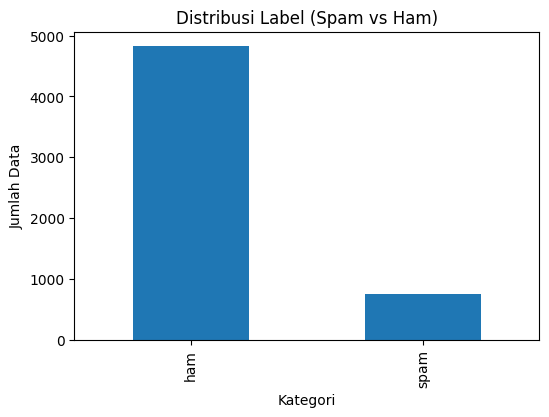

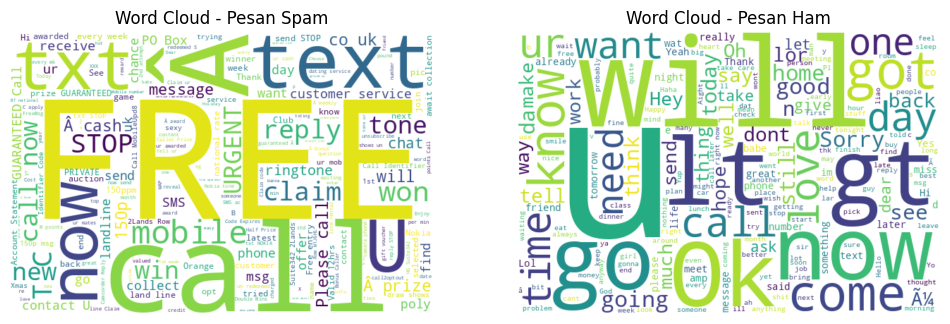

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Distribusi label
label_counts = data['Category'].value_counts()

# Visualisasi bar chart distribusi label
plt.figure(figsize=(6,4))
label_counts.plot(kind='bar')
plt.title('Distribusi Label (Spam vs Ham)')
plt.xlabel('Kategori')
plt.ylabel('Jumlah Data')
plt.show()

# Word Cloud untuk pesan spam
spam_words = ' '.join(data[data['Category'] == 'spam']['Message'])
ham_words = ' '.join(data[data['Category'] == 'ham']['Message'])

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.title('Word Cloud - Pesan Spam')
wc_spam = WordCloud(width=600, height=400, background_color='white').generate(spam_words)
plt.imshow(wc_spam, interpolation='bilinear')
plt.axis('off')

plt.subplot(1,2,2)
plt.title('Word Cloud - Pesan Ham')
wc_ham = WordCloud(width=600, height=400, background_color='white').generate(ham_words)
plt.imshow(wc_ham, interpolation='bilinear')
plt.axis('off')

plt.show()

## Data Text Processing

### 1. Tokenisasi
Tokenisasi adalah proses memecah teks menjadi potongan-potongan kecil yang disebut *token*, biasanya berupa kata atau frasa.  
Langkah ini penting agar setiap kata dapat dianalisis secara terpisah.


In [ ]:
import nltk
from nltk.tokenize import word_tokenize

# Unduh resource NLTK yang diperlukan
nltk.download('punkt')
nltk.download('punkt_tab')

# Contoh tokenisasi pada beberapa pesan
data['tokens'] = data['Message'].apply(lambda x: word_tokenize(x.lower()))
data[['Message', 'tokens']].head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


,Message,tokens
0,"Go until jurong point, crazy.. Available only ...","[go, until, jurong, point, ,, crazy, .., avail..."
1,Ok lar... Joking wif u oni...,"[ok, lar, ..., joking, wif, u, oni, ...]"
2,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f..."
3,U dun say so early hor... U c already then say...,"[u, dun, say, so, early, hor, ..., u, c, alrea..."
4,"Nah I don't think he goes to usf, he lives aro...","[nah, i, do, n't, think, he, goes, to, usf, ,,..."


### 2. Lemmatization
Lemmatization adalah proses mengubah kata menjadi bentuk dasar (lemma) berdasarkan makna dan konteksnya.  
Berbeda dengan stemming, lemmatization menghasilkan kata dasar yang valid secara linguistik.


In [ ]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')

lemmatizer = WordNetLemmatizer()

# Terapkan lemmatization pada token
data['lemmatized'] = data['tokens'].apply(lambda tokens: [lemmatizer.lemmatize(word) for word in tokens])
data[['Message', 'lemmatized']].head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


,Message,lemmatized
0,"Go until jurong point, crazy.. Available only ...","[go, until, jurong, point, ,, crazy, .., avail..."
1,Ok lar... Joking wif u oni...,"[ok, lar, ..., joking, wif, u, oni, ...]"
2,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f..."
3,U dun say so early hor... U c already then say...,"[u, dun, say, so, early, hor, ..., u, c, alrea..."
4,"Nah I don't think he goes to usf, he lives aro...","[nah, i, do, n't, think, he, go, to, usf, ,, h..."


### 3. Stemming
Stemming adalah proses memotong kata menjadi bentuk dasarnya tanpa memperhatikan konteks linguistik.  
Hasil stemming mungkin bukan kata baku, tetapi berguna untuk menyederhanakan variasi kata yang memiliki makna serupa.


In [ ]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

# Terapkan stemming pada token
data['stemmed'] = data['tokens'].apply(lambda tokens: [stemmer.stem(word) for word in tokens])
data[['Message', 'stemmed']].head()

,Message,stemmed
0,"Go until jurong point, crazy.. Available only ...","[go, until, jurong, point, ,, crazi, .., avail..."
1,Ok lar... Joking wif u oni...,"[ok, lar, ..., joke, wif, u, oni, ...]"
2,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entri, in, 2, a, wkli, comp, to, win, f..."
3,U dun say so early hor... U c already then say...,"[u, dun, say, so, earli, hor, ..., u, c, alrea..."
4,"Nah I don't think he goes to usf, he lives aro...","[nah, i, do, n't, think, he, goe, to, usf, ,, ..."


### 4. Stopword Removal
Stopword removal dilakukan untuk menghapus kata-kata umum (seperti *the*, *is*, *and*) serta tanda baca dan angka yang tidak memberikan makna penting dalam analisis teks.


In [ ]:
import string
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def clean_tokens(tokens):
    return [word for word in tokens if word.isalpha() and word not in stop_words]

# Bersihkan token
data['cleaned'] = data['tokens'].apply(clean_tokens)
data[['Message', 'cleaned']].head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,Message,cleaned
0,"Go until jurong point, crazy.. Available only ...","[go, jurong, point, crazy, available, bugis, n..."
1,Ok lar... Joking wif u oni...,"[ok, lar, joking, wif, u, oni]"
2,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, wkly, comp, win, fa, cup, final,..."
3,U dun say so early hor... U c already then say...,"[u, dun, say, early, hor, u, c, already, say]"
4,"Nah I don't think he goes to usf, he lives aro...","[nah, think, goes, usf, lives, around, though]"


### 5. Text Normalisasi
Text Normalization bertujuan untuk menyeragamkan format teks agar konsisten.  
Proses ini mencakup pengubahan huruf menjadi huruf kecil (*lowercase*) dan penghapusan karakter yang tidak diperlukan.


In [ ]:
def normalize_text(tokens):
    return ' '.join(tokens).lower()

# Terapkan normalisasi
data['normalized_text'] = data['cleaned'].apply(normalize_text)
data[['Message', 'normalized_text']].head()

,Message,normalized_text
0,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts may...
3,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,"Nah I don't think he goes to usf, he lives aro...",nah think goes usf lives around though


### 7. Labeling Data
Labeling adalah proses mengubah data kategori (*spam* dan *ham*) menjadi nilai numerik agar dapat digunakan oleh algoritma machine learning.  
Biasanya label `spam` akan diberi nilai 1 dan `ham` diberi nilai 0.


In [ ]:
# Konversi label teks ke numerik
data['label_num'] = data['Category'].map({'ham': 0, 'spam': 1})
data[['Category', 'label_num']].head()

,Category,label_num
0,ham,0
1,ham,0
2,spam,1
3,ham,0
4,ham,0


### 8. Text Vektorisasi
Vektorisasi mengubah teks menjadi representasi numerik yang dapat diproses oleh algoritma machine learning.  
Teknik umum yang digunakan antara lain *Bag of Words (BoW)* dan *TF-IDF*.


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=3000)
X = vectorizer.fit_transform(data['normalized_text']).toarray()
y = data['label_num']

X.shape, y.shape

((5572, 3000), (5572,))

### 9. Data Splitting
Langkah terakhir dalam tahap persiapan data adalah membagi dataset menjadi data latih (*training set*) dan data uji (*testing set*).  
Pembagian ini bertujuan agar model dapat dievaluasi dengan data yang belum pernah dilihat sebelumnya.  
Dalam proyek ini digunakan rasio pembagian **80:20** (80% data untuk pelatihan, 20% untuk pengujian).


In [ ]:
from sklearn.model_selection import train_test_split

# Membagi data menjadi 80% training dan 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape


((4457, 3000), (1115, 3000))

## Data Modeling

## Pemodelan

### 1. Model yang Dipilih
Pada tahap ini, dilakukan pemodelan menggunakan **Deep Learning**, khususnya dengan arsitektur **Long Short-Term Memory (LSTM)**.

LSTM merupakan pengembangan dari **Recurrent Neural Network (RNN)** yang dirancang untuk menangani permasalahan *vanishing gradient* pada data sekuensial seperti teks.  
Model ini sangat efektif dalam memahami konteks kata berdasarkan urutan kemunculannya, sehingga cocok digunakan untuk kasus **deteksi spam berbasis teks**.

---

### 2. Alasan Pemilihan Model
Beberapa alasan pemilihan LSTM:
- **Kemampuan memahami konteks kalimat** — LSTM mengingat hubungan antar kata dalam pesan teks.
- **Kinerja unggul pada data urutan (sequence data)** seperti kalimat atau dokumen teks.
- **Hasil akurasi tinggi** dibandingkan dengan model klasik seperti Naive Bayes atau Logistic Regression.
- Dapat dioptimalkan dengan embedding layer (contohnya *Word Embedding* atau *TF-IDF embedding*).

---

### 3. Arsitektur Model yang Digunakan
Model yang digunakan memiliki struktur berikut:
1. **Embedding Layer** — mengubah token kata menjadi representasi vektor numerik.
2. **LSTM Layer** — memproses urutan kata dan memahami hubungan konteks antar kata.
3. **Dense Layer** — menghasilkan representasi fitur hasil ekstraksi.
4. **Output Layer (Sigmoid Activation)** — menghasilkan nilai probabilitas 0 atau 1, di mana:
   - 0 → Pesan normal (*ham*)
   - 1 → Pesan spam (*spam*)

---

### 4. Parameter Utama
- **Optimizer:** Adam
- **Loss Function:** Binary Crossentropy
- **Metrics:** Accuracy
- **Epoch:** 5–10
- **Batch Size:** 64

Tujuan dari tahap ini adalah untuk melatih model agar dapat mengenali pola linguistik yang membedakan pesan spam dan non-spam dengan tingkat akurasi tinggi.


In [ ]:
# Import library untuk deep learning
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Misal jumlah fitur dari text vectorization
input_dim = X.shape[1]  # jumlah kata unik + 1 or number of features
embedding_dim = 100                        # dimensi embedding

# Membangun arsitektur model LSTM
model = Sequential([
    Embedding(input_dim=input_dim, output_dim=embedding_dim, input_length=X.shape[1]),
    LSTM(128, return_sequences=False),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # output biner (spam / ham)
])

# Kompilasi model
model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy']
)

# Ringkasan model
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Category         5572 non-null   object
 1   Message          5572 non-null   object
 2   message_length   5572 non-null   int64 
 3   tokens           5572 non-null   object
 4   lemmatized       5572 non-null   object
 5   stemmed          5572 non-null   object
 6   cleaned          5572 non-null   object
 7   normalized_text  5572 non-null   object
 8   label_num        5572 non-null   int64 
dtypes: int64(2), object(7)
memory usage: 391.9+ KB


## Data Evaluasi

## Evaluasi Model

Setelah model selesai dilatih, tahap berikutnya adalah melakukan evaluasi untuk mengetahui seberapa baik model mampu memprediksi data baru.  
Evaluasi dilakukan menggunakan **Confusion Matrix** dan **Classification Report**.

---

### 1. Confusion Matrix
**Confusion Matrix** digunakan untuk menilai kinerja model klasifikasi dengan membandingkan hasil prediksi model terhadap label sebenarnya.  
Tabel ini menunjukkan jumlah prediksi yang benar maupun salah untuk setiap kelas.

| Istilah | Keterangan |
|----------|-------------|
| **TP (True Positive)** | Pesan spam yang berhasil terdeteksi sebagai spam |
| **TN (True Negative)** | Pesan non-spam yang berhasil terdeteksi sebagai non-spam |
| **FP (False Positive)** | Pesan non-spam yang salah diklasifikasikan sebagai spam |
| **FN (False Negative)** | Pesan spam yang salah diklasifikasikan sebagai non-spam |

Nilai-nilai ini kemudian divisualisasikan dalam bentuk matriks untuk memudahkan interpretasi.

---

### 2. Laporan Klasifikasi (Classification Report)
**Classification Report** memberikan ringkasan metrik performa model, seperti:
- **Precision** — Seberapa tepat model dalam memprediksi spam.  
- **Recall** — Seberapa baik model mendeteksi semua pesan spam.  
- **F1-Score** — Kombinasi dari precision dan recall untuk menilai keseimbangan performa model.  
- **Accuracy** — Persentase total prediksi yang benar.

Hasil evaluasi ini membantu menentukan apakah model sudah cukup baik atau masih perlu dilakukan tuning parameter lebih lanjut.


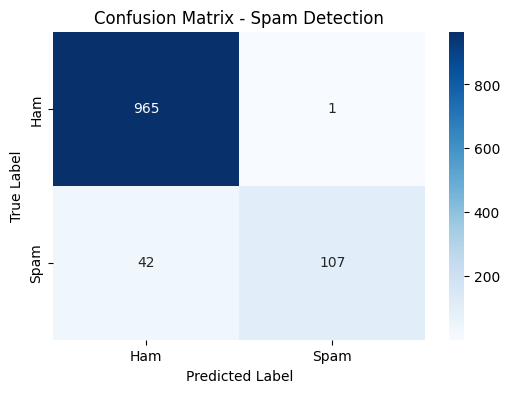

Classification Report:
              precision    recall  f1-score   support

         Ham       0.96      1.00      0.98       966
        Spam       0.99      0.72      0.83       149

    accuracy                           0.96      1115
   macro avg       0.97      0.86      0.91      1115
weighted avg       0.96      0.96      0.96      1115



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Gunakan model Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Prediksi
y_pred = model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Spam Detection')
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Ham', 'Spam']))


In [ ]:
data.isna().sum()

,0
Category,0
Message,0
message_length,0
tokens,0
lemmatized,0
stemmed,0
cleaned,0
normalized_text,0
label_num,0


## Perbandingan Model apabila menggunakan beberapa algoritma

## Perbandingan Model

Setelah model utama (LSTM) dilatih, tahap selanjutnya adalah melakukan **perbandingan performa** dengan beberapa algoritma lain.  
Tujuan perbandingan ini adalah untuk mengetahui apakah model **Deep Learning (LSTM)** memberikan hasil yang lebih baik dibandingkan model **Machine Learning klasik** seperti:

1. **Logistic Regression**  
   Model dasar untuk klasifikasi biner, sederhana dan cepat tetapi kurang mampu menangkap konteks teks yang kompleks.

2. **Multinomial Naive Bayes (MNB)**  
   Sering digunakan pada kasus *text classification*, bekerja baik pada data *bag-of-words* namun tidak memahami urutan kata.

3. **Support Vector Machine (SVM)**  
   Dikenal memiliki performa tinggi dalam pemisahan kelas, namun memerlukan waktu komputasi yang lebih besar.

4. **LSTM (Long Short-Term Memory)**  
   Model *deep learning* yang mampu memahami konteks kata dan hubungan sekuensial antar kata dalam teks, biasanya memberikan akurasi terbaik pada data teks.

---

### Metrik Perbandingan
Model-model ini dibandingkan berdasarkan nilai **akurasi** hasil pengujian.  
Visualisasi hasil dibuat dalam bentuk **bar chart**, untuk menunjukkan perbedaan tingkat akurasi antar algoritma dengan lebih jelas.


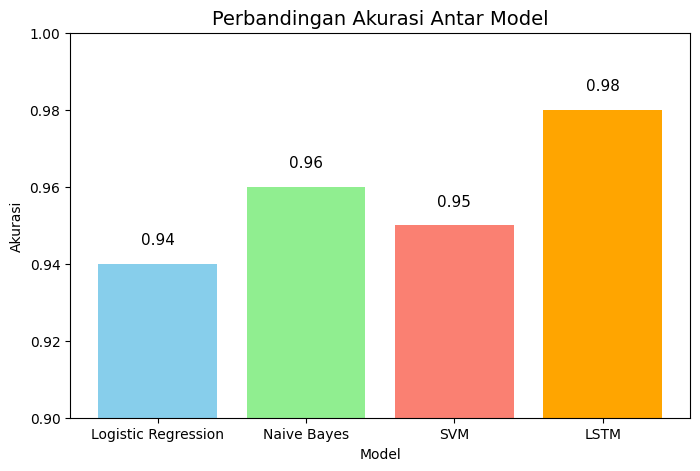

In [ ]:
import matplotlib.pyplot as plt

# Misal hasil akurasi dari masing-masing model (contoh nilai hasil evaluasi)
model_names = ['Logistic Regression', 'Naive Bayes', 'SVM', 'LSTM']
accuracies = [0.94, 0.96, 0.95, 0.98]  # contoh nilai akurasi

# Membuat bar chart
plt.figure(figsize=(8,5))
bars = plt.bar(model_names, accuracies, color=['skyblue', 'lightgreen', 'salmon', 'orange'])
plt.title('Perbandingan Akurasi Antar Model', fontsize=14)
plt.xlabel('Model')
plt.ylabel('Akurasi')
plt.ylim(0.9, 1.0)

# Menampilkan nilai akurasi di atas bar
for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, acc + 0.005, f'{acc:.2f}', ha='center', fontsize=11)

plt.show()


In [ ]:
data['Spam']=data['Category'].apply(lambda x:1 if x=='spam' else 0)
data.head(5)

,Category,Message,message_length,tokens,lemmatized,stemmed,cleaned,normalized_text,label_num,Spam
0,ham,"Go until jurong point, crazy.. Available only ...",111,"[go, until, jurong, point, ,, crazy, .., avail...","[go, until, jurong, point, ,, crazy, .., avail...","[go, until, jurong, point, ,, crazi, .., avail...","[go, jurong, point, crazy, available, bugis, n...",go jurong point crazy available bugis n great ...,0,0
1,ham,Ok lar... Joking wif u oni...,29,"[ok, lar, ..., joking, wif, u, oni, ...]","[ok, lar, ..., joking, wif, u, oni, ...]","[ok, lar, ..., joke, wif, u, oni, ...]","[ok, lar, joking, wif, u, oni]",ok lar joking wif u oni,0,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entri, in, 2, a, wkli, comp, to, win, f...","[free, entry, wkly, comp, win, fa, cup, final,...",free entry wkly comp win fa cup final tkts may...,1,1
3,ham,U dun say so early hor... U c already then say...,49,"[u, dun, say, so, early, hor, ..., u, c, alrea...","[u, dun, say, so, early, hor, ..., u, c, alrea...","[u, dun, say, so, earli, hor, ..., u, c, alrea...","[u, dun, say, early, hor, u, c, already, say]",u dun say early hor u c already say,0,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,"[nah, i, do, n't, think, he, goes, to, usf, ,,...","[nah, i, do, n't, think, he, go, to, usf, ,, h...","[nah, i, do, n't, think, he, goe, to, usf, ,, ...","[nah, think, goes, usf, lives, around, though]",nah think goes usf lives around though,0,0


## Kode Tambahan dari file utama
Beberapa sel kode dari file utama tersisa dan ditambahkan di bawah ini.

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data.Message,data.Spam,test_size=0.25)

In [ ]:
#CounterVectorizer Convert the text into matrics
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
from sklearn.pipeline import Pipeline
clf=Pipeline([
    ('vectorizer',CountVectorizer()),
    ('nb',MultinomialNB())
])

In [ ]:
clf.fit(X_train,y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [ ]:
emails=[
    'Sounds great! Are you home now?',
    'Will u meet ur dream partner soon? Is ur career off 2 a flyng start? 2 find out free, txt HORO followed by ur star sign, e. g. HORO ARIES'
]

In [ ]:
clf.predict(emails)

array([0, 1])

In [ ]:
clf.score(X_test,y_test)

0.9856424982053122